# P01: The Classification Pipeline

In this practical, you will practice putting together a simple classification pipeline. We shall begin with k-Nearest Neighbor. The goals of this practical are as follows:

1. Understand the basic machine learning (classification) pipeline 
2. Understand how to perform hyperparameter tuning
3. Develop proficiency in writing efficient vectorized code with numpy
4. implement and apply a k-Nearest Neighbor (kNN) classifier

The kNN classifier consists of two stages:

* During **training**, the classifier simply remembers the training  it
* During **testing**, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples

Finally, the value of k will be **cross-validated** to determine the best k settings for the task.

In [1]:
from lib import cifar10
from lib.common import show_thumbnails

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the plot
plt.rcParams['image.interpolation'] = 'nearest'

# set to automatic reload
%load_ext autoreload             
%autoreload 2           

## Loading the dataset

In [3]:
# fix unix, dos file path
import os
X_train, y_train, X_test, y_test = cifar10.load_data (os.sep.join(['.','data','cifar-10-batches-py']))
classes = cifar10.get_classes()
num_classes = len(classes)

print('classes:', classes)

Load ./data/cifar-10-batches-py/data_batch_1
Load ./data/cifar-10-batches-py/data_batch_2
Load ./data/cifar-10-batches-py/data_batch_3
Load ./data/cifar-10-batches-py/data_batch_4
Load ./data/cifar-10-batches-py/data_batch_5
Load ./data/cifar-10-batches-py/test_batch
classes: ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Exploring the CIFAR10 dataset

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class.

Let's explore the dataset to understand it. First, we visualize some examples from the dataset.

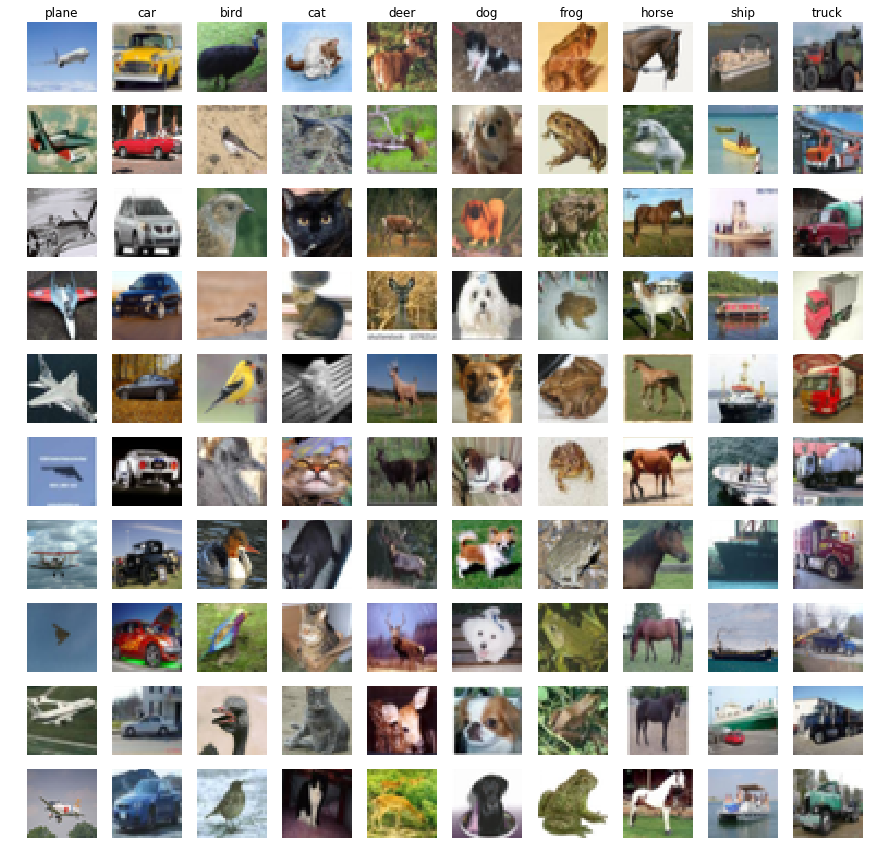

In [4]:
show_thumbnails (X_train, y_train, classes)

**What is the type of X_train?**

In [5]:
# Your answer here
X_train.dtype

dtype('uint8')

**What is the type of y_train?**

In [6]:
# Your answer here
y_train.dtype

dtype('uint8')

**What is the size of the training samples?**

In [7]:
# Your answer here
X_train.shape[0]

50000

**What is the dimension of each sample? What does it mean?**

In [8]:
# Your answer here
X_train.shape[1:]

(32, 32, 3)

**What is the size of the testing samples?**

In [9]:
# Your answer here
X_test.shape[0]

10000

**How many classes are there? What are all the labels for y_train? How many samples are there for each class in the training set?**

In [10]:
# Your answer here

**How many samples are there for each class in the testing set?**

In [11]:
# Your answer here

** Visualize the first record of X_train and show its label ** 
<br> Tips: Refer to the function `show_thumbnails` for clues (Commands: `plt.figure`, `plt.imshow`, `plt.title`, and `plt.show`). Remember to reshape your image to the appropriate shape before displaying

In [12]:
# Your answer here

## Preparing our data

We would now like to classify the test data with the kNN classifier. We shall implement functions to (1) train the model and (2) predict the model.

For the following experiment, for more efficient code execution, we shall subsample only 5000 training samples and 500 test samples.

In [13]:
# convert X_train and X_test from uint to double for easy and precise computing
X_train = X_train.astype('double')
X_test = X_test.astype('double')

num_test = 500
num_training = 5000

mask = list(range(num_training))
X_train = X_train[mask]
y_train = np.take(y_train, mask)

mask = list(range(num_test))
X_test = X_test[mask]
y_test = np.take(y_test, mask)

print ('Number of training samples:', len(X_train))
print ('Number of testing samples:', len(X_test))

Number of training samples: 5000
Number of testing samples: 500


**Exercise 1: Reshape the sample**

Each sample has a size of (32,32,3) whereas the whole training set has a size of (5000, 32, 32, 3) and the testing set (500, 32, 32, 3). Reshape the image data (each sample) into rows such that the size of the training and testing set are reshaped to (5000, 3072) and (500, 3072) respectively. 

In [14]:
# Your code here: Reshape the image data into rows
X_train = X_train.reshape(5000, 3072)
X_test = X_test.reshape(500, 3072)

## Training

**Exercise 2: Implement the `train` function**: 

First, open `lib/knn_classifier.py` and implement the function **`train`** to train the classifier. For k-nearest neighbors, this is just memorizing the training data. 

If your function is successfully implemented, the following code would show that 5000 samples and labels are saved.

In [15]:
from lib.knn_classifier import KNN
classifier = KNN()
classifier.train(X_train, y_train)
print('Saved', len(classifier.X_train), 'samples')
print('Saved', len(classifier.y_train), 'labels')

Saved 5000 samples
Saved 5000 labels


## Prediction

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:

1. First we must compute the distances between all test examples and all train examples.
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

**Exercise 3: Compute the distance matrix between all training and test samples (non-vectorized version).**

Lets begin with computing the distance matrix between all training and test examples. For example, if there are Ntr training examples and Nte test examples, this stage should result in a Nte x Ntr matrix where each element (i,j) is the distance between the i-th test and j-th train example.

Implement the function **`compute_distances_two_loops`** in `lib/knn_classifier.py`. The function uses a very *inefficient* double for loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

In [16]:
dists = classifier.compute_distances_two_loops(X_test) # compute the distance between the test set and training set
print('Shape of dists =', dists.shape)       # expecting a shape of 500 by 5000

Shape of dists = (500, 5000)


The following code shows the distance between the 1st training and testing samples as well as the last samples. Expected answer = 3803 and 8041. 

Notes: If you get an answer of 565.86 and 576.74 respectively, the distance computed by `compute_distances_two_loops` is not correct. Debug your code and make the necessary changes to make it work.  

In [17]:
print(dists[0][0])      
print(dists[-1][-1])

3803.92350080808
8041.052232139771


**Exercise 4: Implement the function `predict`**

Implement the function **`predict`** in `lib/knn_classifier.py` and run the code below: Use k = 1 (which is Nearest Neighbor). You should expect the predicted label for the first 5 samples are [4 9 8 8 4] 

In [18]:
y_test_pred = classifier.predict(X_test, which_ver= 2, k=1)
print(y_test_pred[:5])

[4 9 8 8 4]


**Exercise 5: Implement the function to compute the accuracy of predict_labels**

The accuracy value is simply You should expect to see approximately 27.4% accuracy.

In [19]:
def get_accuracy (pred, actual, printMsg=True):
    
    # Put your code here     
    diff = (pred == actual)
    
    num_correct = np.sum(diff)
    accuracy = np.mean(diff)
        
    if printMsg:
        print('Test accuracy: Got {:d} / {:d} correct => accuracy: {:.1f}%'.format(num_correct, len(actual), accuracy*100))
        
    return num_correct, accuracy

In [20]:
num_correct, accuracy = get_accuracy(y_test_pred, y_test)

Test accuracy: Got 137 / 500 correct => accuracy: 27.4%


Now, let's try to use k = 5. You should expect a slightly better performance with k = 5 (approximately 27.8% accuracy).

In [21]:
y_test_pred = classifier.predict(X_test, k=5)
num_correct, accuracy = get_accuracy(y_test_pred, y_test)

Test accuracy: Got 139 / 500 correct => accuracy: 27.8%


---

## Coursework Assignment 1 (5 marks)

** Submission**:

This is the first coursework assignment which extends this practical. Complete this section and upload the following files to WBLE by 04 Feb 2018. 
* `knn_classifier.py`
* `P01_classification_pipeline.ipynb`
---

**Task 1: Partial vectorization of the distance matrix**

Speed up distance matrix computation by using partial vectorization with **one loop**. Implement the function **`compute_distances_one_loop`** in `lib/knn_classifier.py` and run the code below.

To ensure that our vectorized implementation is correct, we make sure that it agrees with the naive implementation. There are many ways to decide whether two matrices are similar; one of the simplest is the Frobenius norm. In case you haven't seen it before, the Frobenius norm of two matrices is the square root of the squared sum of differences of all elements; in other words, reshape  the matrices into vectors and compute the Euclidean distance between them.

In [22]:
dists_one = classifier.compute_distances_one_loop(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: {:.2f}'.format(difference))
if difference < 0.001:
    print('Congrats: the distance matrices are the same')
else:
    print('Opps! The distance matrices are different. There is some problem with your implementation')

Difference was: 0.00
Congrats: the distance matrices are the same


---
**Task 2: Full vectorization of the distance matrix**

Implement the fully vectorized version with **no loop** inside **`compute_distances_no_loops`** in `lib/knn_classifier.py` and run the code.

Hint:

Consider the following vectors:
``` Python
a = [[a1 a2 a3], 
     [a4 a5 a6]]

b = [[b1 b2 b3],
     [b4 b5 b6],
     [b7 b8 b9]]
       
dist(a,b) = [[d1 d2, d3],
             [d4,d5, d6]] 
```
Let's derive the l2 distance between the first samples for `a` and `b`:

`d1` = l2 distance between `[a1, a2, a3]` and `[b1, b2, b3]`
<br> = $\sqrt{(a_1-b_1)^2 + (a_2-b_2)^2 + (a_3-b_3)^2)}$ 
<br> = $\sqrt{(a_1^2 + a_2^2 + a_3^2) + (b_1^2 + b_2^2 + b_3^2) - 2*(a_1b_1 + a_2b_2, + a_3b_3)}$       ...(EQ1)

The solution is based on the generalization of EQ1 to all items in the distance matrix. The implementation involves two broadcast sum (to get the first two terms for all elements) and one matrix multiplication (to get the third term for all elements).

In [23]:
dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: {:.2f}'.format(difference))
if difference < 0.001:
    print('Congrats: the distance matrices are the same')
else:
    print('Opps! The distance matrices are different. There is some problem with your implementation')

Difference was: 0.00
Congrats: the distance matrices are the same


Now that you have implemented three versions of compute distance. Let's compare them and see the difference in speed between them. You should see significantly faster performance with the fully vectorized implementation.

In [24]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Non-vectorized (two loops) version took {:.2f} seconds'.format(two_loop_time))

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('Partially vectorized (one loop) version took {:.2f} seconds'.format(one_loop_time))

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('Fully vectorized (no loop) version took {:.2f} seconds'.format(no_loop_time))

Non-vectorized (two loops) version took 33.87 seconds
Partially vectorized (one loop) version took 100.81 seconds
Fully vectorized (no loop) version took 0.66 seconds


---
**Task 3: Hyperparameter optimization**

We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.  In the following, we shall use grid search to look for the best `k` hyperparameter.  

**Question**: 
In general, *random search* works better than a *grid search* for hyperparameter optimization. Why do we use **grid search** but not random search here? 

Answer:

*___________Put your answer here________________*

In the following, write the algorithm to perform the cross validation. Use 5 folds and evaluate across k = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]. Then find the best hyperparameter to use for the testing set.

Store your result into the dictionary `k_accuracies`. It should contain 10 items corresponding to  the evaluated k settings. Each item should store num_folds (i.e., 5) values. Each value corresponds to the kNN accuracy value on a particular fold

In [ ]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]        #hyperparameter to test

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
k_accuracies = dict()                                    
for k in k_choices:
    k_accuracies[k] = []                                  
    
knn_classifier = KNN()

################################################################################
# ToDo:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times.   #
#                                                                              #
# Use scikit-learn's StratifiedKFold to perform the stratification.            #
#                                                                              #
# Store the accuracies for all fold and all values of k into the               #
# k_accuracies dictionary.                                                     #
#                                                                              #
# To make your code more efficient, you can avoid computing the distance       #
# matrix repeatedly                                                            #
################################################################################

# Put your code here


In [ ]:
# print the accuracies for different k and fold 
for k in k_choices:
    print("k =", k, ", accuracies=", ["{:.4f}".format(accuracy) for accuracy in k_accuracies[k]])

In [ ]:
# plot the raw observations
for k in k_choices:
    accuracies = k_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

---
**Task 4: Evaluate on test set**

Based on the cross-validation results above, choose the best value for k, retrain the classifier using all the training data, and test it on the test data. 

First get the best hyperparameter value.

In [ ]:
# Put your code here

Finally, evaluate your testset. You should be able to get above 28% accuracy on the test data.

In [ ]:
# Put your code here